In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


fp = ff1.get_session(2023, 'Singapore', 'FP2')
#fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

Long Run

In [17]:
drivers = pd.unique(fp.laps['Driver'])
driver_laps_static = fp.laps.pick_drivers(drivers)

In [ ]:
driver_laps = driver_laps_static.loc[((driver_laps_static['Driver'] == "VER")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==3)) |
                                     ((driver_laps_static['Driver'] == "PER")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==4)) |
                                     ((driver_laps_static['Driver'] == "LEC")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==5)) |
                                     ((driver_laps_static['Driver'] == "SAI")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==4)) |
                                     ((driver_laps_static['Driver'] == "HAM")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==4)) |
                                     ((driver_laps_static['Driver'] == "RUS")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==3)) |
                                     ((driver_laps_static['Driver'] == "ALO")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==4))]
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

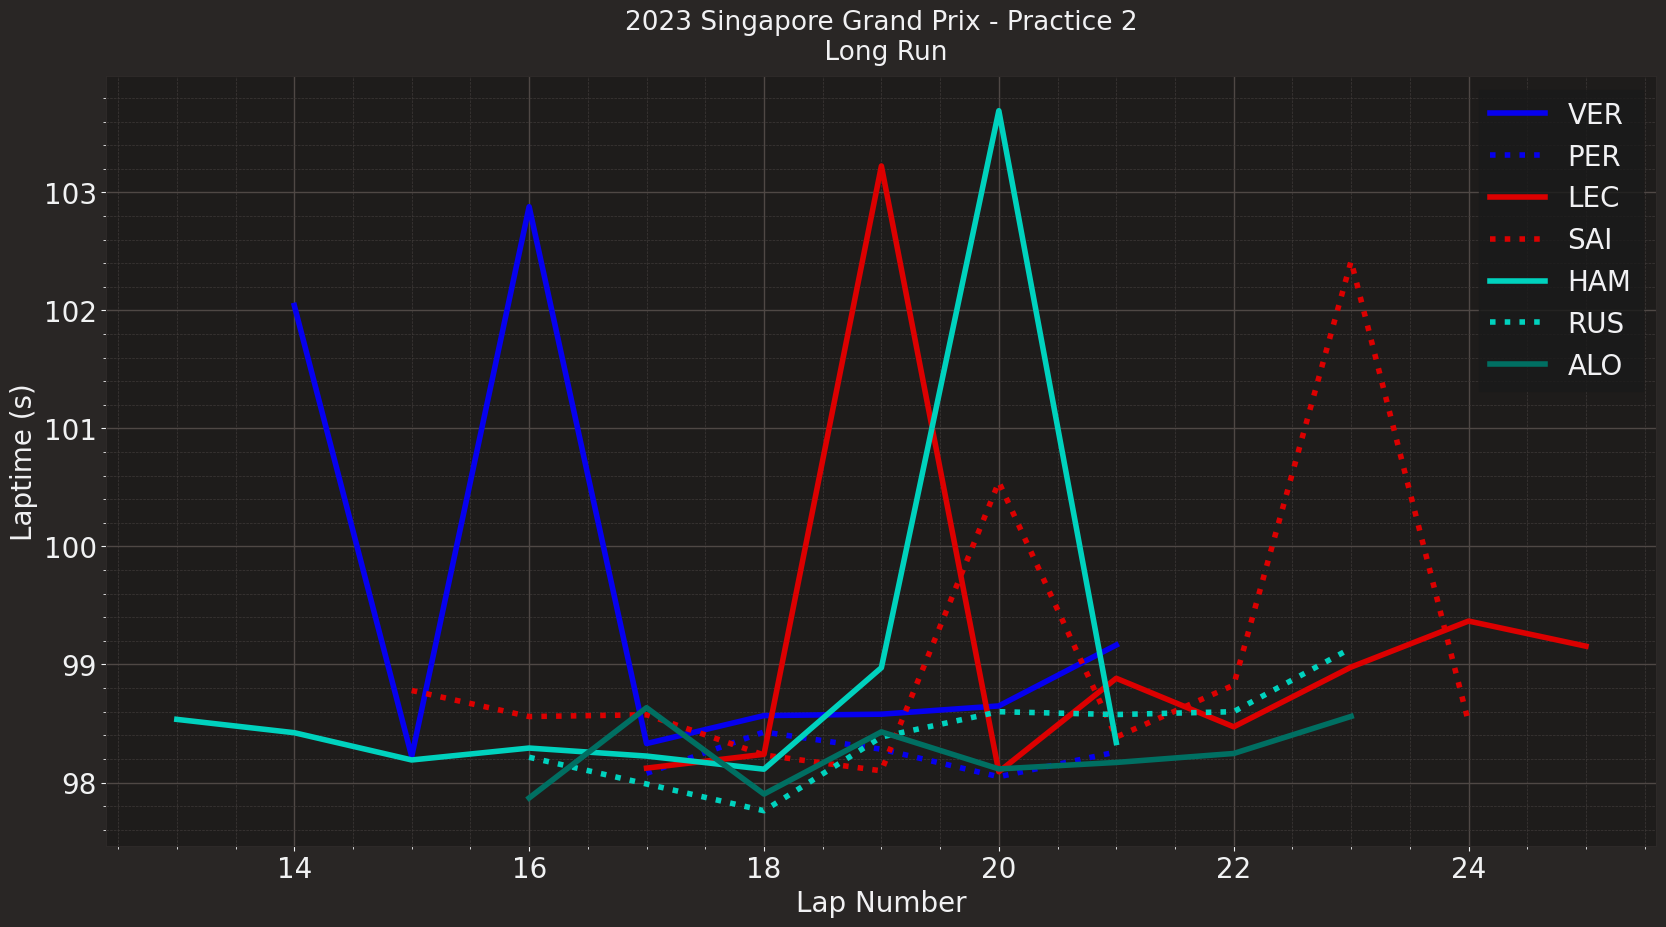

In [20]:

driver_laps = driver_laps.drop(driver_laps[driver_laps['LapTime(s)'] > 110].index)
drivers_to_visualize = ["VER", "PER", "LEC", "SAI", "HAM", "RUS", "ALO"]

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 10]
plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()

# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    single_driver_laps = driver_laps.pick_driver(driver)[['Driver', 'LapNumber', 'LapTime(s)', 'Team', 'TyreLife']]
  
    # Select all the laps from that driver
    single_driver_laps = single_driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(single_driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = single_driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=single_driver_laps['LapTime(s)']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle, linewidth=4)
    
    # Append labels
    ax.set_ylabel("Laptime (s)", size=20)
    ax.set_xlabel("Lap Number", size=20)
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n Long Run")

    # Generate legend
    ax.legend(prop={'size': 20})
    ax.tick_params(labelsize=20)
    visualized_teams.append(team)

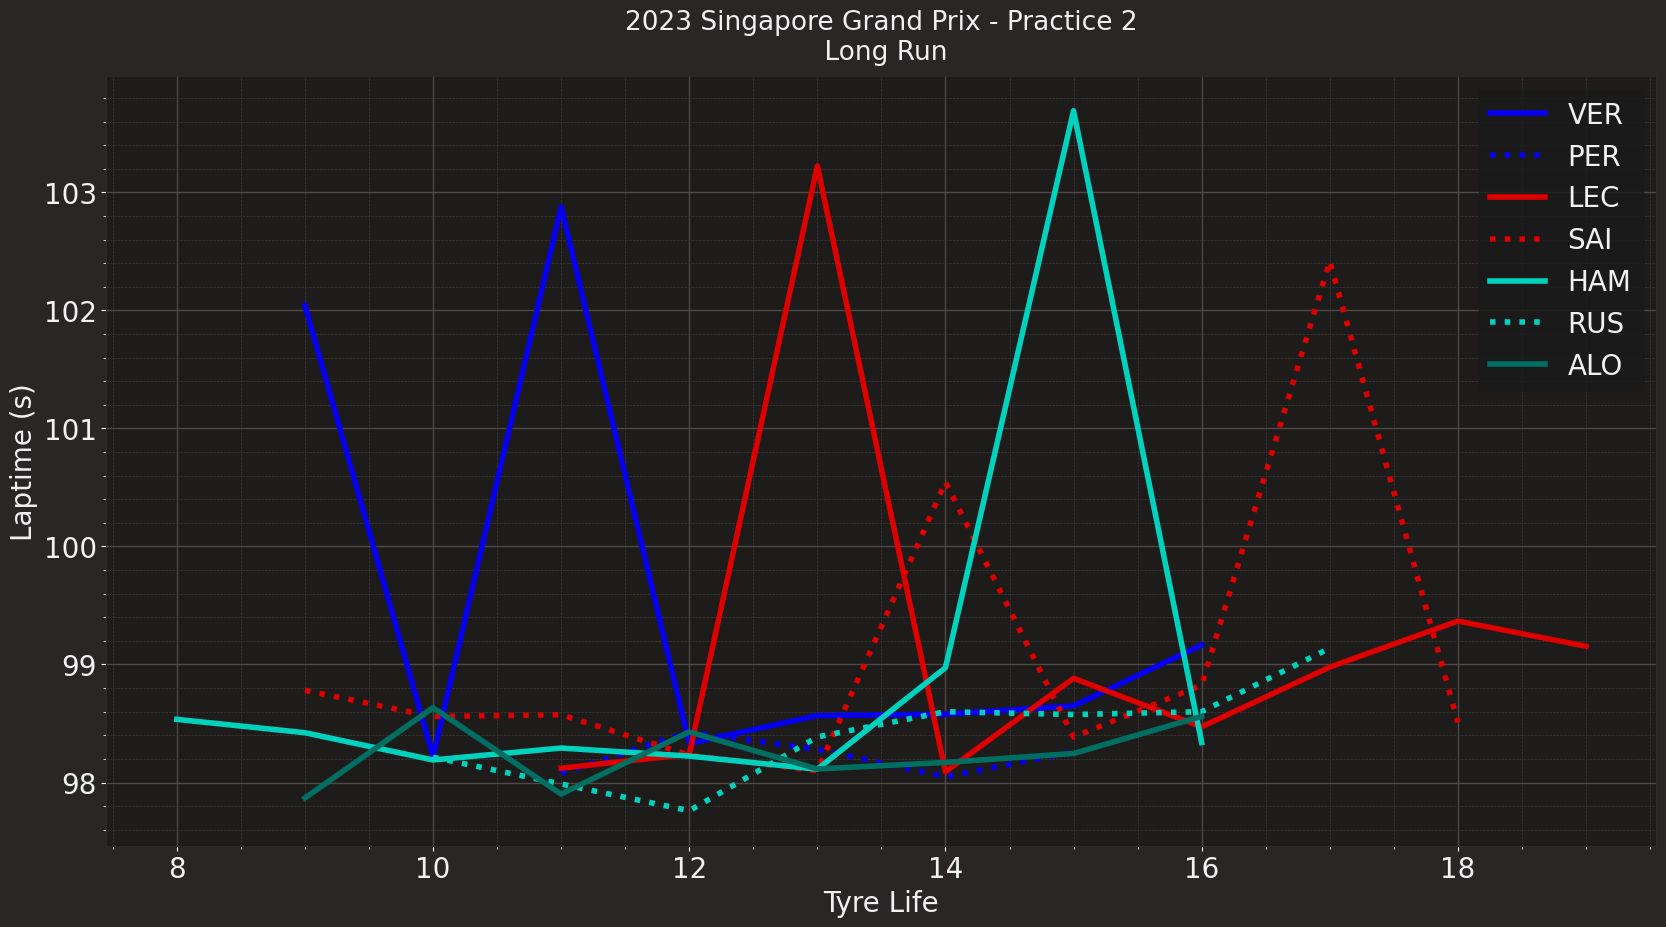

In [22]:

driver_laps = driver_laps.drop(driver_laps[driver_laps['LapTime(s)'] > 110].index)
drivers_to_visualize = ["VER", "PER", "LEC", "SAI", "HAM", "RUS", "ALO"]

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 10]
plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()

# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    single_driver_laps = driver_laps.pick_driver(driver)[['Driver', 'LapNumber', 'LapTime(s)', 'Team', 'TyreLife']]
  
    # Select all the laps from that driver
    single_driver_laps = single_driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(single_driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = single_driver_laps['TyreLife']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=single_driver_laps['LapTime(s)']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle, linewidth=4)
    
    # Append labels
    ax.set_ylabel("Laptime (s)", size=20)
    ax.set_xlabel("Tyre Life", size=20)
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n Long Run")

    # Generate legend
    ax.legend(prop={'size': 20})
    ax.tick_params(labelsize=20)
    visualized_teams.append(team)

In [ ]:
driver_laps = driver_laps_static.loc[((driver_laps_static['Driver'] == "VER")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==3)) |
                                     ((driver_laps_static['Driver'] == "PER")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==4)) |
                                     ((driver_laps_static['Driver'] == "LEC")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==5)) |
                                     ((driver_laps_static['Driver'] == "SAI")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==4)) |
                                     ((driver_laps_static['Driver'] == "HAM")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==4)) |
                                     ((driver_laps_static['Driver'] == "RUS")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==3)) |
                                     ((driver_laps_static['Driver'] == "ALO")  & (driver_laps_static['IsAccurate']==True) & (driver_laps_static['Stint']==4))]
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()
driver_laps = driver_laps[driver_laps['LapTime(s)']<100]

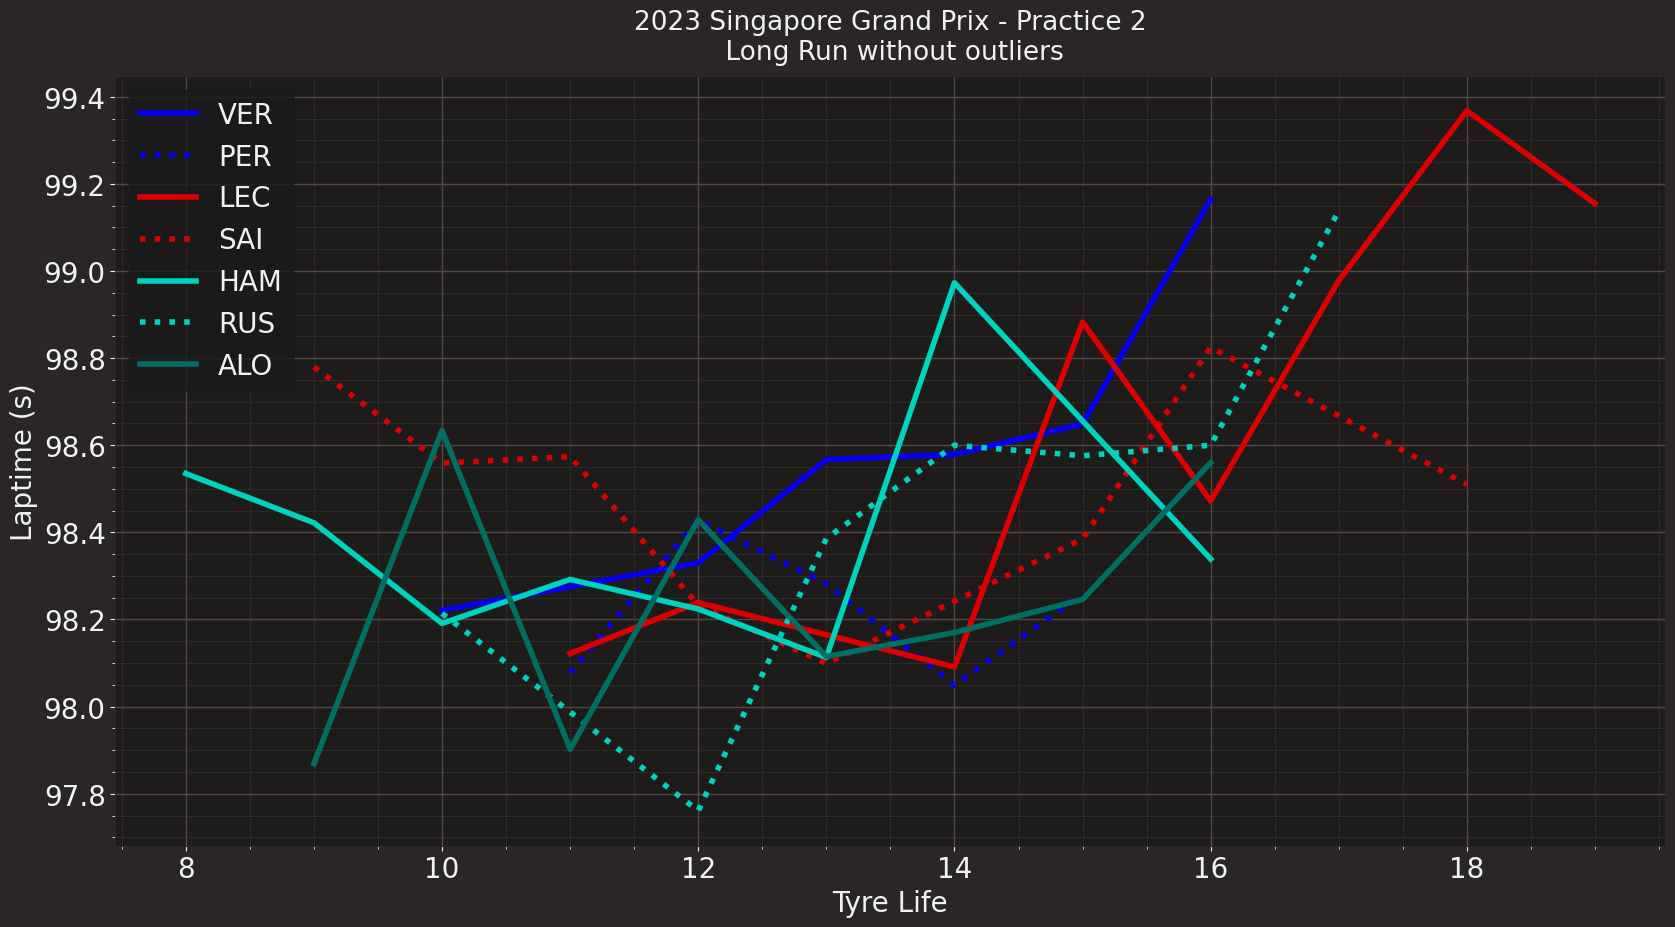

In [27]:

driver_laps = driver_laps.drop(driver_laps[driver_laps['LapTime(s)'] > 110].index)
drivers_to_visualize = ["VER", "PER", "LEC", "SAI", "HAM", "RUS", "ALO"]

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 10]
plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()

# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    single_driver_laps = driver_laps.pick_driver(driver)[['Driver', 'LapNumber', 'LapTime(s)', 'Team', 'TyreLife']]
  
    # Select all the laps from that driver
    single_driver_laps = single_driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(single_driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = single_driver_laps['TyreLife']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=single_driver_laps['LapTime(s)']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle, linewidth=4)
    
    # Append labels
    ax.set_ylabel("Laptime (s)", size=20)
    ax.set_xlabel("Tyre Life", size=20)
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n Long Run without outliers")

    # Generate legend
    ax.legend(prop={'size': 20})
    ax.tick_params(labelsize=20)
    visualized_teams.append(team)

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


fp = ff1.get_session(2023, 'Singapore', 'FP1')
#fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

Text(0.5, 0.98, '2023 Singapore Grand Prix - Practice 1\nFastest Lap: 01:33.350 (LEC)')

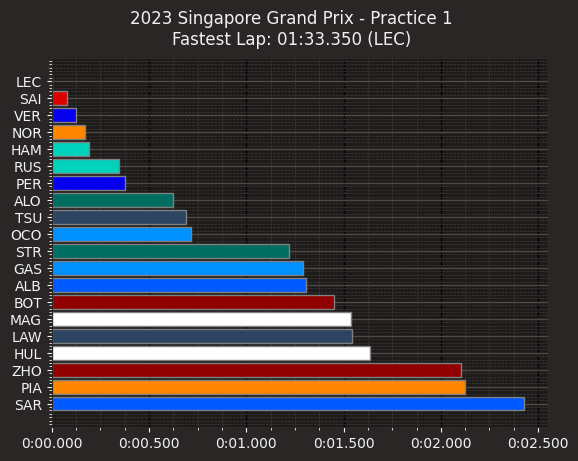

In [2]:
drivers = pd.unique(fp.laps['Driver'])
best_laps = list()
for driver in drivers:
        best_laps.append(fp.laps.pick_driver(driver).pick_fastest())
fastest_laps = Laps(best_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)
        
ff1.plotting.setup_mpl()
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")


C:\Users\ricca\AppData\Local\Temp\ipykernel_1332\1763946324.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = fastest_drv1.append(fastest_drv2)


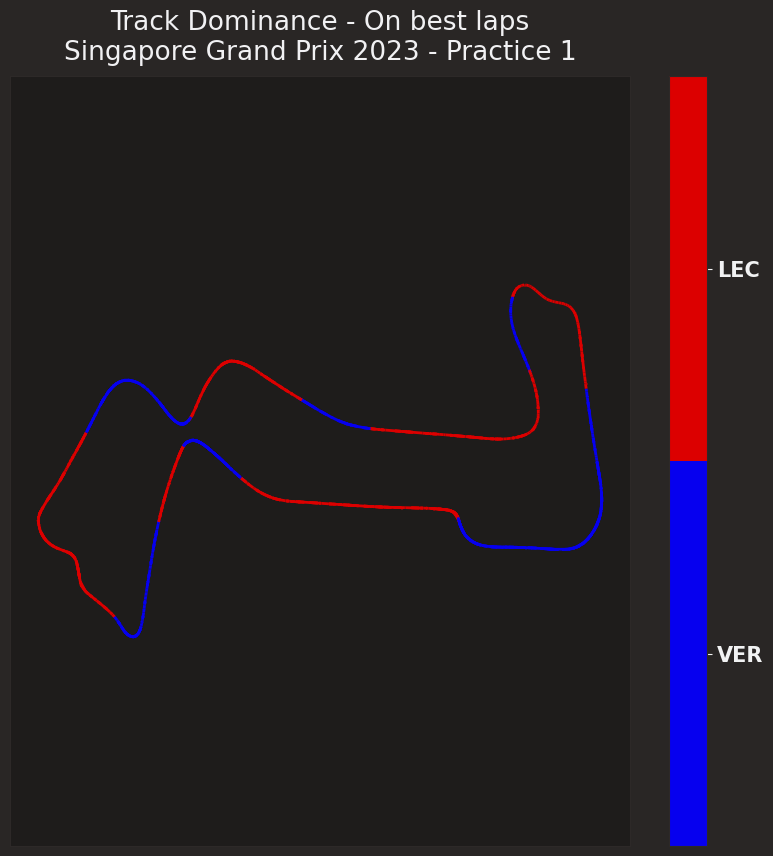

In [4]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
plotting.setup_mpl()
fp_laps = fp.laps
driver1='VER'
driver2='LEC'

color_drv1 = ff1.plotting.team_color('RBR')
color_drv2 = ff1.plotting.team_color('FER')

laps_drv1 = fp_laps.pick_driver(driver1)
laps_drv2 = fp_laps.pick_driver(driver2)


fastest_drv1 = laps_drv1.pick_fastest().get_telemetry().add_distance()
fastest_drv2 = laps_drv2.pick_fastest().get_telemetry().add_distance()

fastest_drv1['Driver'] = driver1
fastest_drv2['Driver'] = driver2

telemetry = fastest_drv1.append(fastest_drv2)

#We want 25 mini-sectors (this can be adjusted up and down)
num_minisectors = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))


telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == driver1, 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == driver2, 'Fastest_driver_int'] = 2


x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

#cmap = cm.get_cmap('cool', 4)
cmap = ListedColormap([color_drv1, color_drv2])
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(2)

plt.rcParams['figure.figsize'] = [10, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f"Track Dominance - On best laps\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 3.5))
cbar.set_ticklabels([driver1, driver2], fontsize=15, fontweight = 'bold')

#plt.text(6000, 4000, f"{driver1}="+str(laps_drv1.pick_fastest().LapTime)[10:19], bbox=dict(boxstyle='round', facecolor=color_drv1, alpha=0.5), fontsize=13)
#plt.text(6000, 3000, f"{driver2}="+str(laps_drv2.pick_fastest().LapTime)[10:19], bbox=dict(boxstyle='round', facecolor=color_drv2, alpha=0.5), fontsize=13)
plt.show()